**Problem Statement**

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,ttest_ind,ttest_rel,chisquare,chi2_contingency,f_oneway,pearsonr,spearmanr,levene,shapiro,kruskal,kstest

In [6]:
df = pd.read_csv("bike_sharing.csv")

In [7]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# Initial Exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
df["Date"] = df["datetime"].str.split(" ",expand=True)[0]

In [12]:
df["Time"] = df["datetime"].str.split(" ",expand=True)[1]

In [13]:
df.drop(columns = ["datetime"],inplace=True)

In [14]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  Date        10886 non-null  object 
 12  Time        10886 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


# Exploratory Data Analysis using both graphical and non-graphical means

In [16]:
df["season"].unique()  

array([1, 2, 3, 4])

In [77]:
df_season = df.groupby("season").agg(Sum_of_counts=pd.NamedAgg(column="count",aggfunc="sum"))
df_season["percentage"] = (df_season["Sum_of_counts"]/df_season["Sum_of_counts"].sum())*100
df_season.reset_index(inplace=True)
df_season

,season,Sum_of_counts,percentage
0,1,312498,14.984493
1,2,588282,28.208524
2,3,640662,30.720181
3,4,544034,26.086802


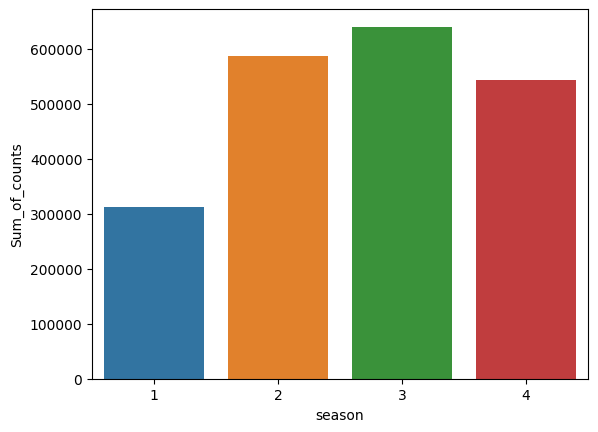

In [79]:
sns.barplot(data=df_season,x="season",y="Sum_of_counts")
plt.show()

<Axes: xlabel='season', ylabel='count'>

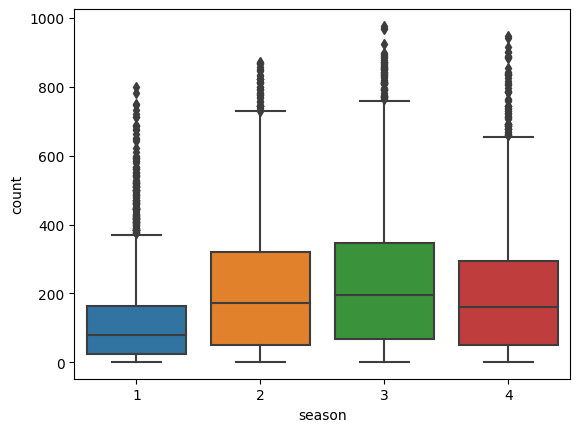

In [81]:
sns.boxplot(data=df,x="season",y="count")

Here - 1: spring, 2: summer, 3: fall, 4: winter



*   Its evident from the above barplot and table that most no. of cycles are rented during Fall season followed by the summer season and the least amount of cycles are rented in the spring season.
*   The above boxplot tells that the data has many outliers and the average counts of bikes rented for each season season is between 120-200.



In [18]:
df["holiday"].unique()

array([0, 1])

In [82]:
df_holiday = df.groupby("holiday").agg(Bikes_rented = pd.NamedAgg(column="count",aggfunc="sum")).reset_index()
df_holiday

,holiday,Bikes_rented
0,0,2027668
1,1,57808


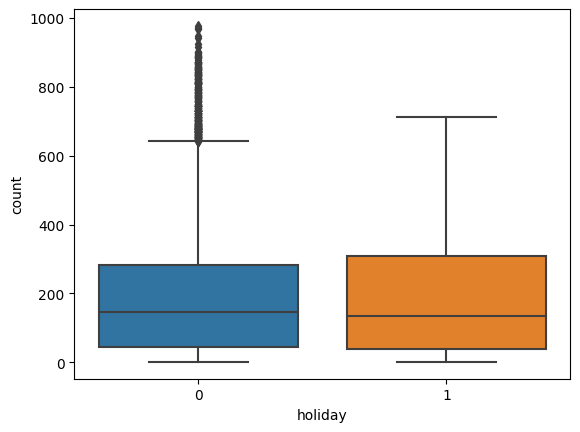

In [89]:
sns.boxplot(data=df,x="holiday",y="count")
plt.show()



*   From above analysis it is clear that higher number of bikes are rented on non-holidays as compared to on holidays.
*   The counts on non-holidays are so astronomical that the boxplot is treating them as outliers. 


In [20]:
df["workingday"].unique()

array([0, 1])

Here - 
1. "1" is for when its neither weekend nor a holiday
2. "0" is for otherwise 

In [70]:
df_workingday = df.groupby("workingday").agg(Bikes_rented = pd.NamedAgg(column="count",aggfunc="sum")).reset_index()
df_workingday["percentage"] = (df_workingday["Bikes_rented"]/df_workingday["Bikes_rented"].sum())*100
df_workingday

,workingday,Bikes_rented,percentage
0,0,654872,31.40156
1,1,1430604,68.59844


<Axes: xlabel='workingday', ylabel='count'>

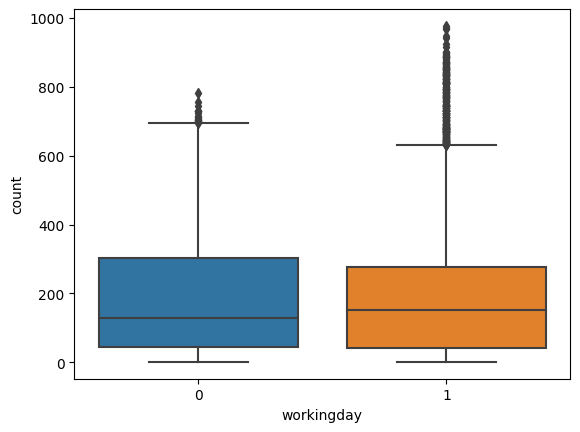

In [91]:
sns.boxplot(data=df,x="workingday",y="count")



*   From above analysis its clear that higher number of bikes are rented on working days, almost about 69% of bikes count in dataset belong to working day group.
*   Here also the counts on working day are so astronomical that the boxplot is treatinf it as outliers.



In [54]:
df["weather"].unique()

array([1, 2, 3, 4])

Weather groups -  

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [94]:
df_weather = df.groupby("weather").agg(Bikes_rented = pd.NamedAgg(column="count",aggfunc="sum"))
df_weather["percentage"] = (df_weather["Bikes_rented"]/df_weather["Bikes_rented"].sum())*100
df_weather

,Bikes_rented,percentage
weather,,
1,1476063,70.778230
2,507160,24.318669
3,102089,4.895237
4,164,0.007864


<Axes: xlabel='weather', ylabel='count'>

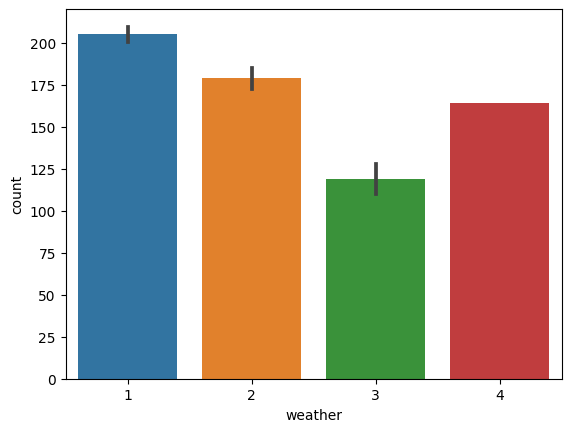

In [97]:
sns.barplot(data=df,x="weather",y="count")



1.   From above analysis it is clear that most amount of bikes are rented on weather group 1, around about 71% of bike counts are from weather group 1.
2.   Very low almost negligible amount of bikes are rented during weather group 4 which is Heavy Rain/Ice Pallets/Thunderstorm/Mist/Snow + Fog.



<Axes: xlabel='weather', ylabel='temp'>

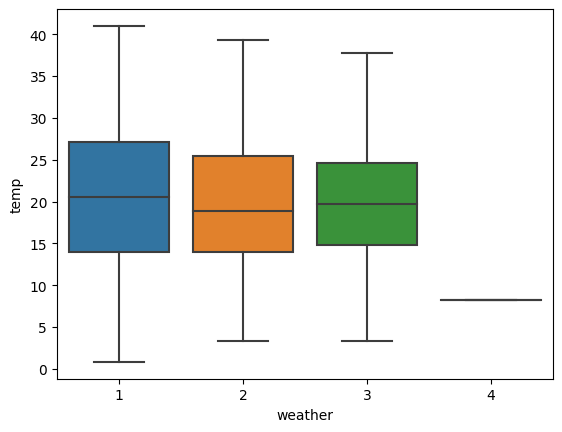

In [100]:
sns.boxplot(data=df,x="weather",y="temp")

The average temperature in different weather groups is almost similar ranging between 18-21 degree C.

<Axes: xlabel='temp', ylabel='count'>

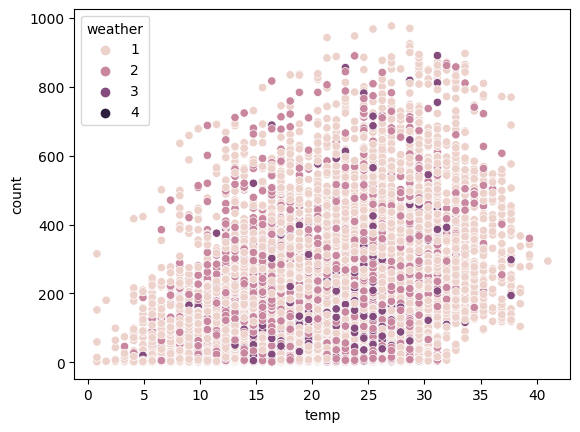

In [99]:
sns.scatterplot(data=df,x="temp",y="count",hue="weather")



*   As expected the dots of weather group 1 is all over the graph in the scatterplot and their temp ranges from very low at 0 to high at 40+
*   While other groups are lesser in number their temperature ranges are also smaller.
*   Most number of bikes are rented in temperature range 20-30 degree C.





In [22]:
df["temp"].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

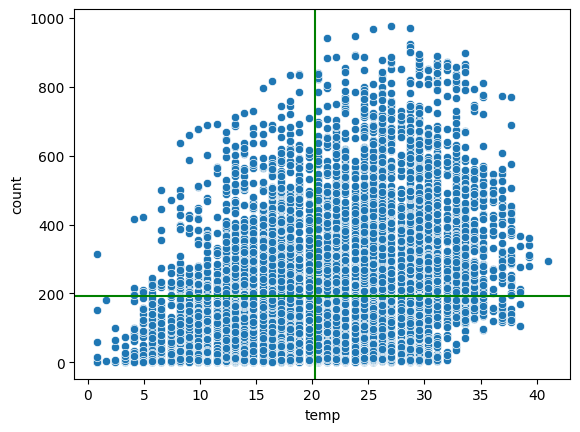

In [26]:
sns.scatterplot(x=df["temp"],y=df["count"])

plt.axvline(df["temp"].mean(),color = "g",linestyle= "-")
plt.axhline(df["count"].mean(),color = "g",linestyle= "-")

In [47]:
t_stat,p_value = pearsonr(df["temp"],df["count"])
print("Pearson_Correlation_Coefficient :",t_stat)

Pearson_Correlation_Coefficient : 0.3944536449672492


In [48]:
t_stat,p_value = spearmanr(df["temp"],df["count"])
print("Spearman_Correlation_Coefficient :",t_stat)

Spearman_Correlation_Coefficient : 0.40798939475098117





*   Since both pearson and spearman give almost same values anyone can be considered.
*   The above scatterplot and pearsonr correlation show that temp and count columns are moderately postively correlated which means that at moderate temps(i.e 25-35 C) counts of bike being rented also increases.

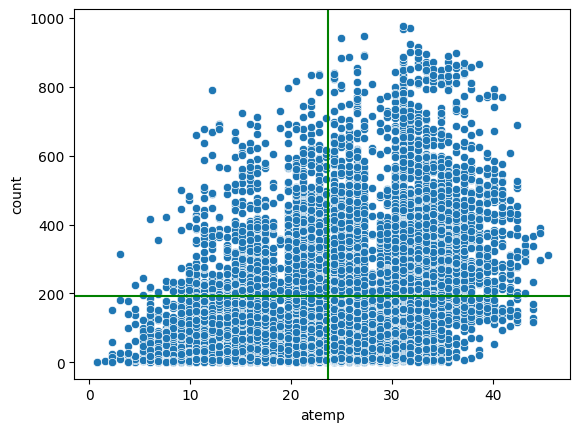

In [41]:
sns.scatterplot(x=df["atemp"],y=df["count"])

plt.axvline(df["atemp"].mean(),color = "g",linestyle= "-")
plt.axhline(df["count"].mean(),color = "g",linestyle= "-")

In [49]:
t_stat,p_value = pearsonr(df["atemp"],df["count"])
print("Pearson_Correlation_Coefficient :",t_stat)

Pearson_Correlation_Coefficient : 0.3897844366269768


In [50]:
t_stat,p_value = spearmanr(df["atemp"],df["count"])
print("Spearman_Correlation_Coefficient :",t_stat)

Spearman_Correlation_Coefficient : 0.4065617539204584


atemp has similar correlations with count as temp had i.e moderately positively correlated and implies that in moderate atemp, the count of bikes being rented increases.

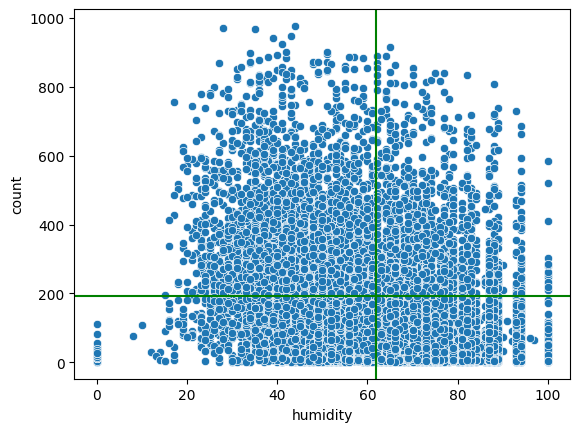

In [53]:
sns.scatterplot(x=df["humidity"],y=df["count"])
plt.axvline(df["humidity"].mean(),color = "g",linestyle= "-")
plt.axhline(df["count"].mean(),color = "g",linestyle= "-")

In [51]:
t_stat,p_value = pearsonr(df["humidity"],df["count"])
print("Pearson_Correlation_Coefficient :",t_stat)

Pearson_Correlation_Coefficient : -0.3173714788765946


In [52]:
t_stat,p_value = spearmanr(df["humidity"],df["count"])
print("Spearman_Correlation_Coefficient :",t_stat)

Spearman_Correlation_Coefficient : -0.35404912201756106


From above scatterplot and pearson & spearman correlation coefficients its clear that humidity and count columns are moderately negatively correlated which means that amount of bikes being rented increases slightly when humidity is moderately low (i.e around 20-40 % humidity).

In [30]:
df["windspeed"].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

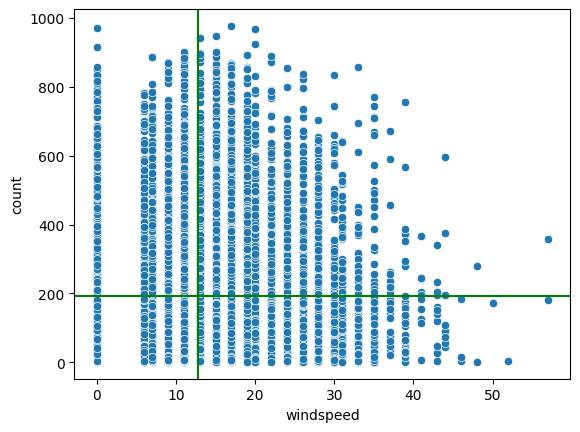

In [103]:
sns.scatterplot(x=df["windspeed"],y=df["count"])
plt.axvline(df["windspeed"].mean(),color = "g",linestyle= "-")
plt.axhline(df["count"].mean(),color = "g",linestyle= "-")

In [101]:
t_stat,p_value = pearsonr(df["windspeed"],df["count"])
print("Pearson_Correlation_Coefficient :",t_stat)

Pearson_Correlation_Coefficient : 0.10136947021033282


In [102]:
t_stat,p_value = spearmanr(df["windspeed"],df["count"])
print("Spearman_Correlation_Coefficient :",t_stat)

Spearman_Correlation_Coefficient : 0.1357773747113304


From above scatterplot and pearson & spearman correlation coefficients its clear that windspeed and count of bikes rented are very weakly correlated, so much so that we can consider them independent of each other.


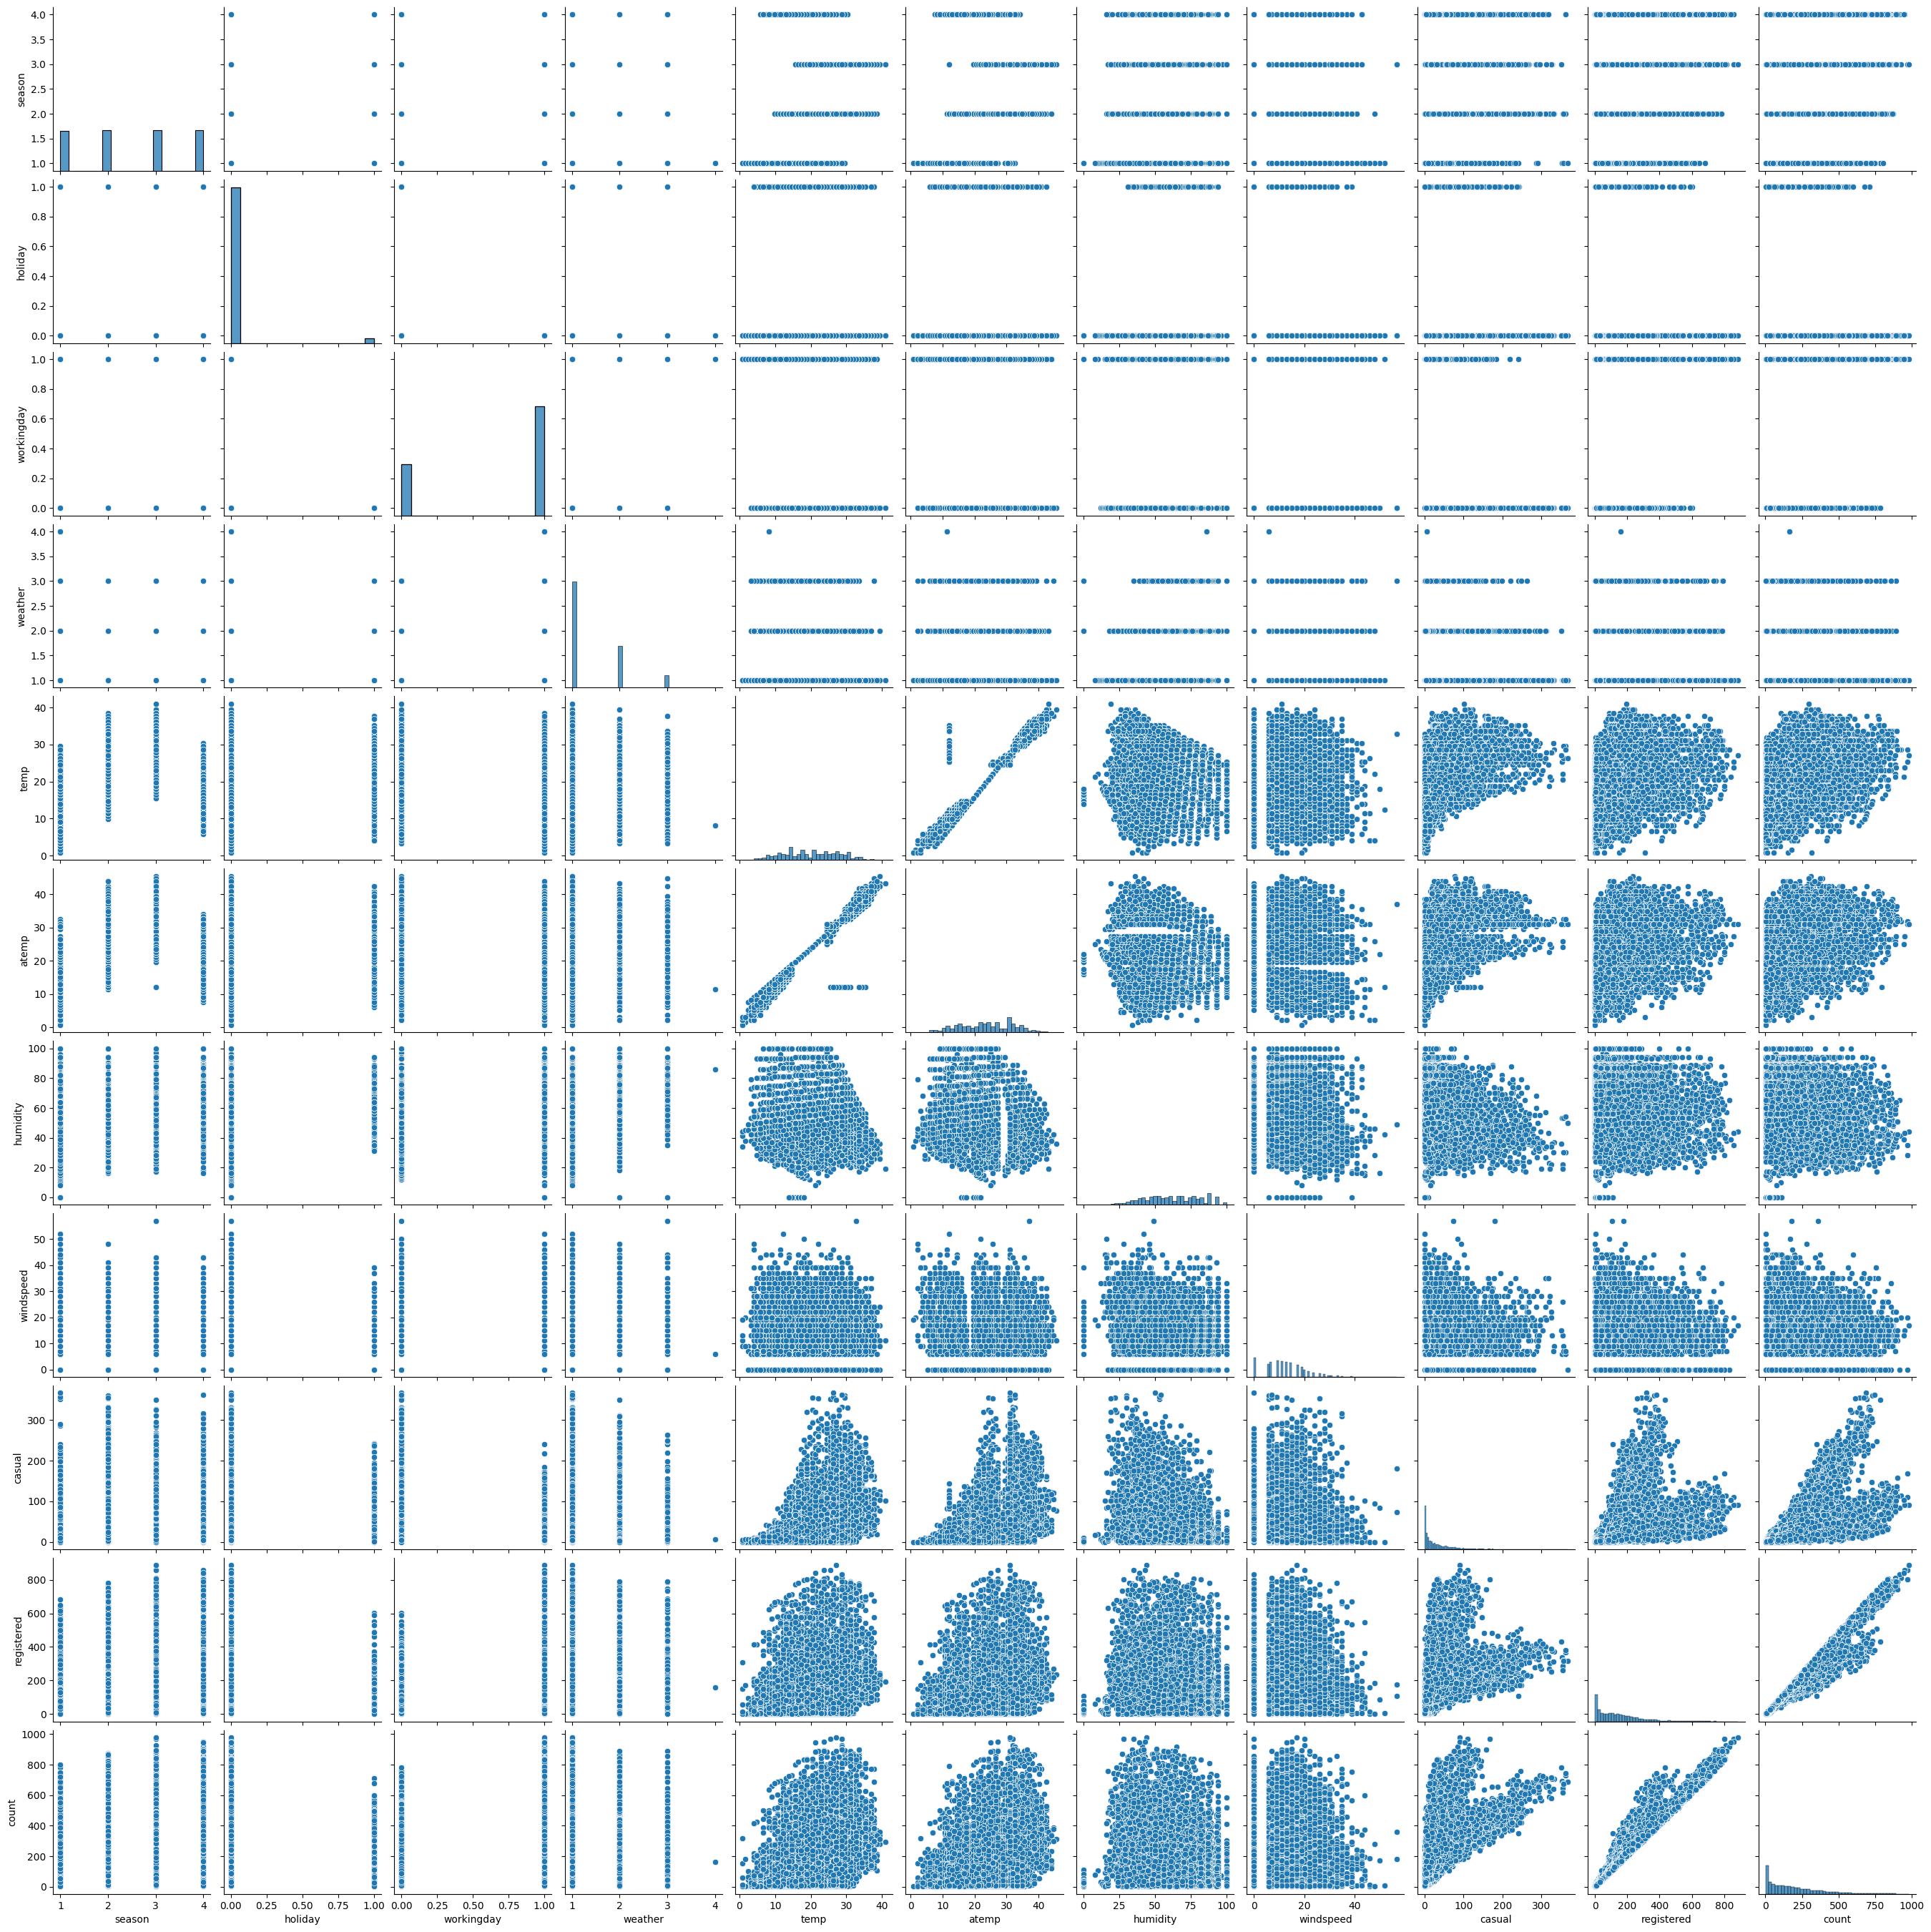

In [104]:
sns.pairplot(df)

In [36]:
df.corr()

<ipython-input-36-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<ipython-input-38-91e6f411a6dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


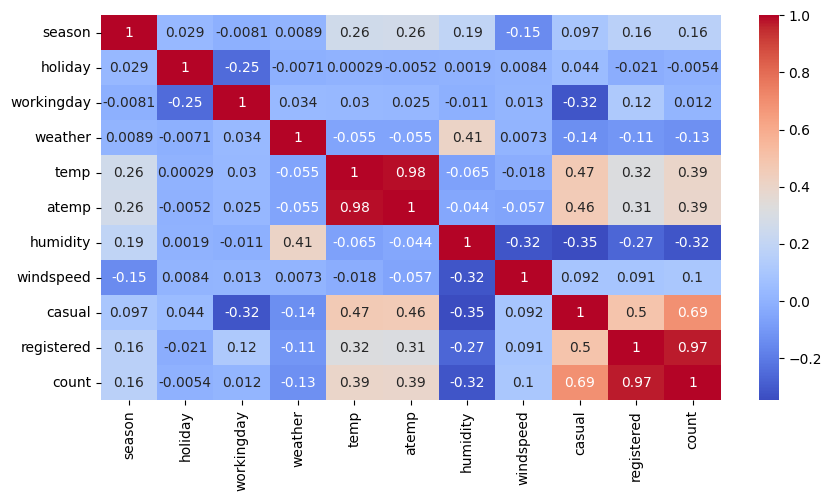

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

All the above scatterplot analysis and pearson and spearman correlation coefficients can be confirmed through the heatmap and pairplot.
Some observations based on heatmap and pairplots - 


*   workingday and casual columns are negatively correlated which signifies that on working day casual renters are less than on a non-working day. Most renters who rent the bikes on working day are registered users.  
*   Weather and humidity are postively correlated which signifies that higher numbered weather groups have higher humidity and lower numbered have lower humidity.
*   Season and weather are uncorrelated which tells us that any kind of weather is possible in any season.





# Hypothesis Testing

## 1. Checking if working day has an effect on the numnber of cycles rented.

Null Hypothesis(Ho) : Working day has no effect on cycles being rented.

Alternate Hypothesis(Ha) : Working day sees more cycles being rented compared to non-working day.

Significance Level: 5%

*   Here I am selecting **ttest** for hypothesis testing since its one categorical and one numerical type data columns.
*   The following ttest will be a **right-tailed test** since we need to prove whether more cycles are rented on working day. 




### Checking test assumptions



*   Using **Levene test** to check the homogeneity of variance.
*   Using Wilkin-Shapiro test to check the normality and also visualizing it.



In [109]:
# Homogeneity of variance test. 

test_stat,p_value = levene(df[df["workingday"]==0]["count"],df[df["workingday"]==1]["count"])
print("p_value: ",p_value)

p_value:  0.9437823280916695


Since p_value (0.94) > significance level (0.05) we can conclude that variance between groups is similar. 

In [120]:
# Checking Normality

test_stat1,p_value = shapiro(df["count"])
print("p_value: ",p_value)

p_value_1:  0.0


<Axes: xlabel='count', ylabel='Count'>

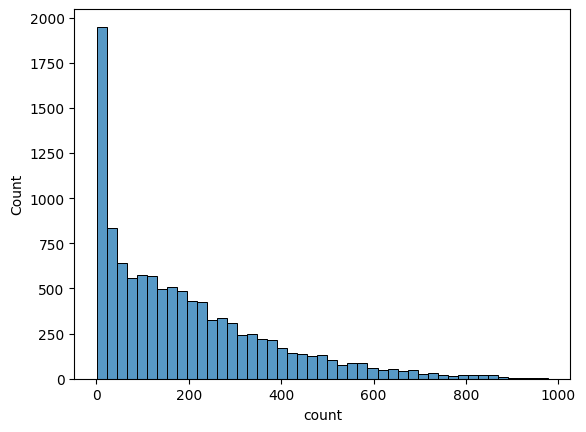

In [122]:
sns.histplot(df["count"])

Both through shapiro test and visualization its clear that the data does not follow normal distribution but as told in problem statement to carry on with testing even if its not following some assumptions, we move forward with ttset.

### Performing the test.

In [123]:
df_nonwork = df[df["workingday"]==0]["count"]
df_work = df[df["workingday"]==1]["count"]

In [127]:
test_stat,p_value = ttest_ind(df_work,df_nonwork,alternative="greater")

print("p_value: ",p_value)

p_value:  0.11322402113180674


Since p_value(0.113) > significance-level (0.05) we can say that we **"Fail to Reject"** the Null Hyothesis that working day has no effect on cycles being rented.

## 2. Checking if number of cycles being rented is different in different weathers.

Null Hypothesis(Ho) : Weather has no effect on number of cycles being rented.

Alternate Hypothesis(Ha) : Weather has an effect on number of cycles being rented.

Significance Level: 5%

*   Here I am selecting **ANNOVA** for hypothesis testing since there are multiple sets of data.

### Checking test assumptions

*   Using **Levene test** to check the homogeneity of variance.
*   Using Wilkin-Shapiro test to check the normality and also visualizing it.

In [128]:
# Homogeneity of variance test. 

test_stat,p_value = levene(df[df["weather"]==1]["count"],df[df["weather"]==2]["count"],df[df["weather"]==3]["count"],df[df["weather"]==4]["count"])
print("p_value: ",p_value)

p_value:  3.504937946833238e-35


In [157]:
# Checking the normality

test_stat1,p_value1 = shapiro(df[df["weather"]==1]["count"])
test_stat2,p_value2 = shapiro(df[df["weather"]==2]["count"])
test_stat3,p_value3= shapiro(df[df["weather"]==3]["count"])
print("p_value1: ",p_value1)
print("p_value2: ",p_value2)
print("p_value3: ",p_value3)

# 4th group doesn't have enough data points to even form a normal distribution.

p_value1:  0.0
p_value2:  9.781063280987223e-43
p_value3:  3.876090133422781e-33


Since all p_value are less than significance-level(0.05) which signifies that variance between groups is statistically different and the data does not follow normal distribution. Thus it fails the assumptions of ANNOVA and when this happens we use **Kruskal-Wallis test**, so going forward with Kruskal test. 


### Performaing the test.

In [160]:
df_w1 = df[df["weather"]==1]["count"]
df_w2 = df[df["weather"]==2]["count"]
df_w3 = df[df["weather"]==3]["count"]
df_w4 = df[df["weather"]==4]["count"]

test_stat,p_value = kruskal(df_w1,df_w2,df_w3,df_w4)

print("p_value: ",p_value)

p_value:  3.501611300708679e-44


Since p_value(3.501611300708679e-44) < significance-level (0.05) we can say that we **"Reject"** the Null Hyothesis that weather has no effect on number of cycles being rented.

## 3. Checking if number of cycles being rented is different in different seasons.

Null Hypothesis(Ho) : Seasons have no effect on number of cycles being rented.

Alternate Hypothesis(Ha) : Seasons have an effect on number of cycles being rented.

Significance Level: 5%

*   Here I am selecting **ANNOVA** for hypothesis testing since there are multiple sets of data.

### Checking test assumptions

*   Using **Levene test** to check the homogeneity of variance.
*   Using Wilkin-Shapiro test to check the normality and also visualizing it.

In [134]:
# Homogeneity of variance test. 

test_stat,p_value = levene(df[df["season"]==1]["count"],df[df["season"]==2]["count"],df[df["season"]==3]["count"],df[df["season"]==4]["count"])
print("p_value: ",p_value)

p_value:  1.0147116860043298e-118


In [158]:
# Checking normality of the data

test_stat1,p_value1 = shapiro(df[df["season"]==1]["count"])
test_stat2,p_value2 = shapiro(df[df["season"]==2]["count"])
test_stat3,p_value3= shapiro(df[df["season"]==3]["count"])
test_stat4,p_value4 = shapiro(df[df["season"]==4]["count"])
print("p_value1: ",p_value1)
print("p_value2: ",p_value2)
print("p_value3: ",p_value3)
print("p_value4: ",p_value4)


p_value1:  0.0
p_value2:  6.039093315091269e-39
p_value3:  1.043458045587339e-36
p_value4:  1.1301682309549298e-39


Since the data fails both the assumptions of ANNOVA i.e. homegeneity of variance and normality of data as the p_values are less than the significance level, we are going to perform **Kruskal-Wallis test**.

### Performing the test

In [159]:
df_s1 = df[df["season"]==1]["count"]
df_s2 = df[df["season"]==2]["count"]
df_s3 = df[df["season"]==3]["count"]
df_s4 = df[df["season"]==4]["count"]

test_stat,p_value = kruskal(df_s1,df_s2,df_s3,df_s4)

print("p_value: ",p_value)

p_value:  2.479008372608633e-151


Since p_value(2.479008372608633e-151) << significance-level (0.05) we can say that we "Reject" the Null Hyothesis that season has no effect on number of cycles being rented. 

## 4. Checking if weather is dependent on season.

Null Hypothesis(Ho) : Weather and seasons are independent features.

Alternate Hypothesis(Ha) : Weather and seasons are dependent on each other.

Significance Level: 5%

*   Here I am choosing **Chi-Sqaure: Test of independence** to carry out the test, since we are comparing two categorical columns.

All the assumptions for Chi-Sqaure test are fullfilled here.

In [152]:
val = pd.crosstab(index=df["weather"],columns=df["season"])
val

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [154]:
test_stat,p_value,dof,expected_freq = chi2_contingency(val)

print("p_value: ",p_value)

p_value:  1.5499250736864862e-07


Since p_value(1.5499250736864862e-07) << significance-level (0.05) we can say that we "Reject" the Null Hyothesis that weather and season are independent, they are dependent on each other.

# Inferences from the analysis



1.   Working day and casual columns are negatively correlated which signifies that on working day casual renters are less than on a non-working day. Most renters who rent the bikes on working day are registered users.
2.   Weather and humidity are postively correlated which signifies that higher numbered weather groups have higher humidity and lower numbered have lower humidity.
3.   Average number of cycles being rented on working day and non-working day have no significant difference between them. This feature can be regarded as not so important.
4.  Weather has a significant effect on cycles being rented as proved by the Kruskal test
5.  Similarly seasons also have a significant effect on number of cycles being rented.
6. Categorical columns season and weather are dependent on each other.
7. From univariate analysis, its observed that higher number of bikes are rented on working days, almost about 69% of bikes count in dataset belong to working day group.
